# ETL ANP PREÇO MÉDIOS DE COMBUSTIVEIS

[FONTE DOS DADOS ANP](https://www.gov.br/anp/pt-br/assuntos/precos-e-defesa-da-concorrencia/precos/levantamento-de-precos-de-combustiveis-ultimas-semanas-pesquisadas)

### Import libs

In [67]:
import os
import sys

import pandas as pd
from datetime import datetime
import sqlite3

import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from ipywidgets import interact

sys.path.append(os.path.abspath('../utils'))
from extract_data import ExtracaoDataANP


## Get RAW DATA

In [31]:
# Extract Data From API ANP
extrai_dados = ExtracaoDataANP()
data_inicial = datetime(2023, 9, 1)
data_final = datetime(2025, 1, 31)
extrai_dados.download_and_process_range(data_inicial, data_final)

Arquivo resumo_semanal_lpc_2023-08-27_2023-09-02.xlsx já existe. Pulando download.
Arquivo resumo_semanal_lpc_2023-09-03_2023-09-09.xlsx já existe. Pulando download.
Arquivo resumo_semanal_lpc_2023-09-10_2023-09-16.xlsx já existe. Pulando download.
Arquivo resumo_semanal_lpc_2023-09-17_2023-09-23.xlsx já existe. Pulando download.
Arquivo resumo_semanal_lpc_2023-09-24_2023-09-30.xlsx já existe. Pulando download.
Arquivo resumo_semanal_lpc_2023-10-01_2023-10-07.xlsx já existe. Pulando download.
Arquivo resumo_semanal_lpc_2023-10-08_2023-10-14.xlsx já existe. Pulando download.
Arquivo resumo_semanal_lpc_2023-10-15_2023-10-21.xlsx já existe. Pulando download.
Arquivo resumo_semanal_lpc_2023-10-22_2023-10-28.xlsx já existe. Pulando download.
Arquivo resumo_semanal_lpc_2023-10-29_2023-11-04.xlsx já existe. Pulando download.
Arquivo resumo_semanal_lpc_2023-11-05_2023-11-11.xlsx já existe. Pulando download.
Arquivo resumo_semanal_lpc_2023-11-12_2023-11-18.xlsx já existe. Pulando download.
Arqu

In [32]:
df = pd.read_csv('../Data/Data-silver/dados_combustiveis_anp.csv')

In [33]:
# Show rawdata
df.head()

,DATA INICIAL,DATA FINAL,ESTADO,MUNICÍPIO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,COEF DE VARIAÇÃO REVENDA,periodo_referencia
0,2023-08-27 00:00:00,2023-09-02 00:00:00,SERGIPE,ARACAJU,ETANOL HIDRATADO,16,R$/l,4.79,0.095708,4.57,4.89,0.020,2023-08-27 a 2023-09-02
1,2023-08-27 00:00:00,2023-09-02 00:00:00,PARA,BELEM,ETANOL HIDRATADO,7,R$/l,4.66,0.328655,4.29,5.19,0.071,2023-08-27 a 2023-09-02
2,2023-08-27 00:00:00,2023-09-02 00:00:00,MINAS GERAIS,BELO HORIZONTE,ETANOL HIDRATADO,40,R$/l,3.50,0.108223,3.34,3.79,0.031,2023-08-27 a 2023-09-02
3,2023-08-27 00:00:00,2023-09-02 00:00:00,RORAIMA,BOA VISTA,ETANOL HIDRATADO,4,R$/l,4.94,0.140000,4.87,5.15,0.028,2023-08-27 a 2023-09-02
4,2023-08-27 00:00:00,2023-09-02 00:00:00,DISTRITO FEDERAL,BRASILIA,ETANOL HIDRATADO,49,R$/l,3.77,0.142499,3.58,3.99,0.038,2023-08-27 a 2023-09-02


## Combustiveis

In [34]:
# Create combustivel dataframe
combustivel = pd.DataFrame(df['PRODUTO'].unique()).sort_values(by = 0).reset_index(drop = True)

# Verifica se ocorreu alterações no histórico de dados
if len(combustivel) < 7:
    combustivel = pd.read_csv(os.path.join(file_path_silver, 'combustiveis.csv'))
    print('Quantidade inferior ao histórico')

elif len(combustivel) > 7:
    print('Diferença no conjuto de dados históricos de combustiveis\n')
    historic_data = pd.read_csv(os.path.join(file_path_silver, 'combustiveis.csv'))
    mask = ~combustivel['PRODUTO'].isin(historic_data['PRODUTO'])
    diferenca = combustivel['PRODUTO'][mask]
    combustivel = pd.concat([historic_data, diferenca.to_frame()])
    combustivel.to_csv('Data/combustiveis.csv', index =False)
    print('Tipos de combustiveis atualizados')
else:
    print('Sem alterações nos tipos de combustiveis históricos')

# Add id for dataframe 
combustivel['id_combustivel'] = range(1, len(combustivel)+1)

# Rename columns
combustivel.rename({0: 'PRODUTO'}, axis = 1, inplace=True)

Sem alterações nos tipos de combustiveis históricos


In [35]:
combustivel

,PRODUTO,id_combustivel
0,ETANOL HIDRATADO,1
1,GASOLINA ADITIVADA,2
2,GASOLINA COMUM,3
3,GLP,4
4,GNV,5
5,OLEO DIESEL,6
6,OLEO DIESEL S10,7


## Estados

In [36]:
# Create estado dataframe
estados = pd.DataFrame(df.ESTADO.unique()).sort_values(by = 0).reset_index(drop = True)

# Verifica se ocorreu alterações no histórico de dados
if len(estados) < 27:
    estados = pd.read_csv(os.path.join(file_path_silver, 'estados.csv'))
    print('Quantidade inferior ao histórico')

elif len(estados) > 27:
    print('Diferença no conjuto de dados históricos: Estados\n')
    historic_data = pd.read_csv(os.path.join(file_path_silver, 'estados.csv'))
    mask = ~estados['ESTADO'].isin(historic_data['ESTADO'])
    diferenca = estados['ESTADO'][mask]
    estados = pd.concat([historic_data, diferenca.to_frame()])
    estados.to_csv('Data/estados.csv', index =False)
    print('Estados atualizados')
else:
    print('Sem alterações no dados dos Estados')

# Add id for dataframe
estados['id_estado'] = range(1, len(estados)+1)

# Rename columns 
estados.rename({0: 'ESTADO'}, axis = 1, inplace=True)

Sem alterações no dados dos Estados


In [37]:
estados

,ESTADO,id_estado
0,ACRE,1
1,ALAGOAS,2
2,AMAPA,3
3,AMAZONAS,4
4,BAHIA,5
5,CEARA,6
6,DISTRITO FEDERAL,7
7,ESPIRITO SANTO,8
8,GOIAS,9
9,MARANHAO,10


## Municípios

In [38]:
# Create municipio dataframe
municipio = df[['MUNICÍPIO' , 'ESTADO']].drop_duplicates().sort_values(by = 'ESTADO').reset_index(drop= True)

# Verifica se ocorreu alterações no histórico de dados
if len(municipio) < 27:
    municipio = pd.read_csv(os.path.join(file_path_silver, 'municipios.csv'))
    print('Quantidade inferior ao histórico')

elif len(municipio) > 27:
    print('Diferença no conjuto de dados históricos: Municipios\n')
    historic_data = pd.read_csv(os.path.join(file_path_silver, 'municipios.csv'))
    mask = ~municipio['MUNICÍPIO'].isin(historic_data['MUNICÍPIO'])
    diferenca = municipio['MUNICÍPIO'][mask]
    municipio = pd.concat([historic_data, diferenca.to_frame()])
    municipio.to_csv('Data/municipios.csv', index =False)
    print('Estados atualizados')
else:
    print('Sem alterações no dados dos municipio')

# Add id for dataframe
municipio['id_municipio'] = range(1, len(municipio) +1)


Sem alterações no dados dos municipio


In [39]:
# Relacionando tabela com tabela estado
municipio = municipio.merge(estados, on = 'ESTADO', how = 'left')\
                     .drop('ESTADO', axis = 1)

In [40]:
municipio

,MUNICÍPIO,id_municipio,id_estado
0,RIO BRANCO,1,1
1,MACEIO,2,2
2,MACAPA,3,3
3,MANAUS,4,4
4,SALVADOR,5,5
5,FORTALEZA,6,6
6,BRASILIA,7,7
7,VITORIA,8,8
8,GOIANIA,9,9
9,SAO LUIS,10,10


## Unidade de medida

In [41]:
# Create unidade dataframe
unidade = pd.DataFrame(df["UNIDADE DE MEDIDA"].unique()).sort_values(by = 0).reset_index(drop = True)

# Verifica se ocorreu alterações no histórico de dados
if len(unidade) < 3:
    unidade = pd.read_csv(os.path.join(file_path_silver, 'unidade_medida.csv'))
    print('Quantidade inferior ao histórico: unidade_medida')

elif len(unidade) > 3:
    print('Diferença no conjuto de dados históricos: unidade_medida\n')
    historic_data = pd.read_csv(os.path.join(file_path_silver, 'unidade_medida.csv'))
    mask = ~unidade['UNIDADE DE MEDIDA'].isin(historic_data['UNIDADE DE MEDIDA'])
    diferenca = unidade['UNIDADE DE MEDIDA'][mask]
    unidade = pd.concat([historic_data, diferenca.to_frame()])
    unidade.to_csv('Data/unidade_medida.csv', index =False)
    print('Dados atualizados: unidade_medida')
else:
    print('Sem alterações no dados: unidade_medida')

# Add id for dataframe
unidade['id_unidade'] = range(1, len(unidade) + 1)

# Rename columns
unidade.rename({0: 'UNIDADE DE MEDIDA'}, axis = 1, inplace = True)



Sem alterações no dados: unidade_medida


In [42]:
unidade

,UNIDADE DE MEDIDA,id_unidade
0,R$/13kg,1
1,R$/l,2
2,R$/m³,3


## Relacionando tabelas

In [43]:
# Add esternal id_columns to a copy original dataframe
df2 = df.merge(unidade, on = 'UNIDADE DE MEDIDA', how = 'left')\
        .merge(municipio.drop('id_estado', axis = 1), on = 'MUNICÍPIO', how = 'left')\
        .merge(estados, on = 'ESTADO', how = 'left')\
        .merge(combustivel, on = 'PRODUTO', how = 'left')

In [44]:
# Drop cols from a copy dataframe
df2 = df2.drop(['ESTADO','MUNICÍPIO','PRODUTO','UNIDADE DE MEDIDA','periodo_referencia'], axis=1)

In [45]:
# add id to a dataframe
#df2['id_preco'] = range(1, len(df2) +1)

In [46]:
df2.head()

,DATA INICIAL,DATA FINAL,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,COEF DE VARIAÇÃO REVENDA,id_unidade,id_municipio,id_estado,id_combustivel
0,2023-08-27 00:00:00,2023-09-02 00:00:00,16,4.79,0.095708,4.57,4.89,0.020,2,26,26,1
1,2023-08-27 00:00:00,2023-09-02 00:00:00,7,4.66,0.328655,4.29,5.19,0.071,2,14,14,1
2,2023-08-27 00:00:00,2023-09-02 00:00:00,40,3.50,0.108223,3.34,3.79,0.031,2,13,13,1
3,2023-08-27 00:00:00,2023-09-02 00:00:00,4,4.94,0.140000,4.87,5.15,0.028,2,23,23,1
4,2023-08-27 00:00:00,2023-09-02 00:00:00,49,3.77,0.142499,3.58,3.99,0.038,2,7,7,1


# Modeling database

### Rename cols

In [47]:
# Rename columns
df2 = df2.rename({
            'DATA INICIAL':'data_inicial',
            'DATA FINAL':'data_final',
            'NÚMERO DE POSTOS PESQUISADOS':'num_postos',
            'PREÇO MÉDIO REVENDA' : 'preco_medio',
            'DESVIO PADRÃO REVENDA': 'preco_std',
            'PREÇO MÍNIMO REVENDA' : 'preco_min',
            'PREÇO MÁXIMO REVENDA' : 'preco_max',
            'COEF DE VARIAÇÃO REVENDA' : 'preco_var'   
                }, axis = 1)

In [48]:
# Rename columns estados dataframe
estados.rename({"ESTADO" : 'estado'}, axis = 1, inplace= True)

# Rename columns municipio dataframe
municipio.rename({'MUNICÍPIO' : 'municipio'}, axis = 1, inplace = True)

# Rename columns combustivel dataframe
combustivel.rename({'PRODUTO' : 'combustivel'}, axis = 1, inplace=True)

# Rename columns unidade dataframe
unidade.rename({'UNIDADE DE MEDIDA' : 'unidade' }, axis = 1, inplace= True)

### Criate Database

In [49]:
# Create Database combustiveis.db using SQLITE3
conn = sqlite3.connect('../Database/combustiveis.db')

# Connect to db
cursor = conn.cursor()

### CRIATE TABLES

In [50]:
# CRIANDO A TABELA ESTADO
cursor.execute('''
    CREATE TABLE IF NOT EXISTS estados (
               id_estado INTEGER PRIMARY KEY AUTOINCREMENT,
               estado VARCHAR(27)
    )
''')


# CRIANDO A TABELA MUNICIPIOS
cursor.execute('''
    CREATE TABLE IF NOT EXISTS municipios (
               id_municipio INTEGER PRIMARY KEY AUTOINCREMENT,
               municipio VARCHAR(35),
               id_estado INT REFERENCES estados(id_estado) 
    )
''')

# CRIANDO A TABELA COMBUSTIVEIS
cursor.execute('''
    CREATE TABLE IF NOT EXISTS combustiveis (
               id_combustivel INTEGER PRIMARY KEY AUTOINCREMENT,
               id_unidade INT REFERENCES unidade_medida(id_unidade),
               combustivel VARCHAR(35)
    )
''')


# CRIANDO A TABELA UNIDADE_medida
cursor.execute('''
    CREATE TABLE IF NOT EXISTS unidade_medida (
               id_unidade INTEGER PRIMARY KEY AUTOINCREMENT,
               unidade VARCHAR(35)
    )
''')

# CRIANDO A TABELA PREÇOS MÉDIOS
cursor.execute('''
    CREATE TABLE IF NOT EXISTS precos_medios (
               id_preco INTEGER PRIMARY KEY AUTOINCREMENT,
               data_inicial DATE NOT NULL,
               data_final DATE NOT NULL,
               num_postos INT,
               preco_medio NUMERIC(10,2),
               preco_std NUMERIC(2,8),
               preco_min NUMERIC(10,2),
               preco_max NUMERIC(10,2),
               preco_var NUMERIC(2,8),
               id_unidade INT REFERENCES unidade_medida(id_unidade),
               id_municipio INT REFERENCES municipios(id_municipio), 
               id_estado INT REFERENCES estados(id_estado), 
               id_combustivel INT REFERENCES combustiveis(id_combustivel)   
    )
''')

# Commit (salvar) as alterações no banco de dados
conn.commit()

### INGESTÃO DE DADOS

In [51]:
# LOAD DATA TO precos_medios table - APPEND
df2.to_sql('precos_medios', conn, if_exists = 'append', index=False)

11816

In [52]:
# LOAD DATA TO estados table - REPLACE ALL DATA
estados.to_sql('estados', conn, if_exists = 'replace', index=False)

# LOAD DATA TO municipios table - REPLACE ALL DATA
municipio.to_sql('municipios', conn, if_exists = 'replace', index=False)

# LOAD DATA TO combustiveis table - REPLACE ALL DATA
combustivel.to_sql('combustiveis', conn, if_exists = 'replace', index=False)

# LOAD DATA TO unidade_medida table - REPLACE ALL DATA
unidade.to_sql('unidade_medida', conn, if_exists = 'replace', index=False)

3

In [53]:
# SQL query to multiple joins
query = '''
    SELECT data_inicial,preco_medio, combustivel, municipio, estado, unidade FROM precos_medios AS precos
    JOIN combustiveis as combustiveis ON precos.id_combustivel = combustiveis.id_combustivel
    JOIN estados as estados on precos.id_estado = estados.id_estado
    JOIN municipios as municipios on precos.id_municipio = municipios.id_municipio
    JOIN unidade_medida as unidade on precos.id_unidade = unidade.id_unidade;
'''

# Load data query in pandas DataFrame
sql_query = pd.read_sql_query(query, conn)
sql_query

,data_inicial,preco_medio,combustivel,municipio,estado,unidade
0,2023-08-27 00:00:00,4.79,ETANOL HIDRATADO,ARACAJU,SERGIPE,R$/l
1,2023-08-27 00:00:00,4.66,ETANOL HIDRATADO,BELEM,PARA,R$/l
2,2023-08-27 00:00:00,3.50,ETANOL HIDRATADO,BELO HORIZONTE,MINAS GERAIS,R$/l
3,2023-08-27 00:00:00,4.94,ETANOL HIDRATADO,BOA VISTA,RORAIMA,R$/l
4,2023-08-27 00:00:00,3.77,ETANOL HIDRATADO,BRASILIA,DISTRITO FEDERAL,R$/l
...,...,...,...,...,...,...
11811,2025-01-26 00:00:00,6.47,OLEO DIESEL S10,SALVADOR,BAHIA,R$/l
11812,2025-01-26 00:00:00,5.94,OLEO DIESEL S10,SAO LUIS,MARANHAO,R$/l
11813,2025-01-26 00:00:00,6.19,OLEO DIESEL S10,SAO PAULO,SAO PAULO,R$/l
11814,2025-01-26 00:00:00,6.21,OLEO DIESEL S10,TERESINA,PIAUI,R$/l


## Data viz

In [74]:
# Slice data
dados_to_plot = sql_query[sql_query['combustivel'] == 'OLEO DIESEL'].groupby(['estado','data_inicial'])[['preco_medio']].min().reset_index()
dados_to_plot['data_inicial'] = pd.to_datetime(dados_to_plot['data_inicial'])

In [55]:
list(sql_query['combustivel'].unique())

['ETANOL HIDRATADO',
 'GASOLINA ADITIVADA',
 'GASOLINA COMUM',
 'GLP',
 'GNV',
 'OLEO DIESEL',
 'OLEO DIESEL S10']

In [78]:
# Create interactive line plot
@interact(estados = list(sql_query.estado.unique()),
          combustivel = list(sql_query['combustivel'].unique()))
def plot_line(estados,combustivel):
    dados_to_plot = sql_query[sql_query['combustivel'] == combustivel].groupby(['estado','data_inicial'])[['preco_medio']].min().reset_index()
    dados_to_plot['data_inicial'] = pd.to_datetime(dados_to_plot['data_inicial'])
    plt.figure(figsize=(16,6))

    ax = sns.lineplot(x=dados_to_plot[dados_to_plot.estado == estados].data_inicial,
                      y= dados_to_plot[dados_to_plot.estado == estados].preco_medio.astype('float64'))
    plt.xticks(rotation=45)
    ax.set(title= f'Evolução dos preços: {combustivel} - {estados}')


interactive(children=(Dropdown(description='estados', options=('SERGIPE', 'PARA', 'MINAS GERAIS', 'RORAIMA', '…

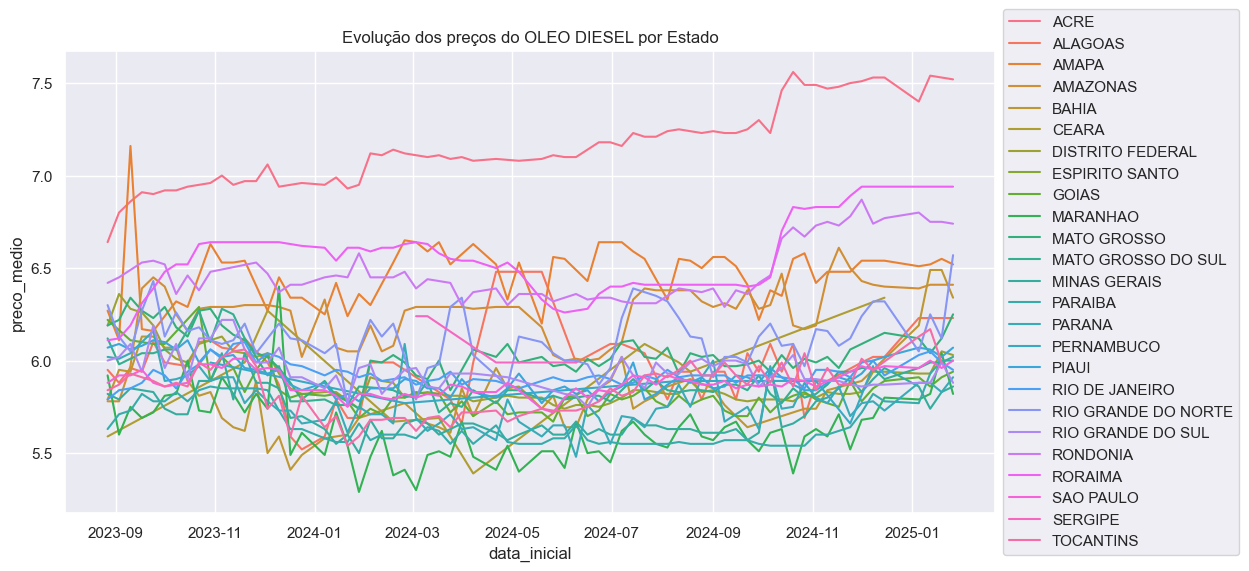

In [77]:
# Create a line plot
plt.figure(figsize=(12,6))

ax = sns.lineplot(x = dados_to_plot.data_inicial,
                  y =  dados_to_plot.preco_medio.astype('float64'),
                  hue = dados_to_plot.estado)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title = 'Evolução dos preços do OLEO DIESEL por Estado')
plt.show()
